# 0. Import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from plot_surfaces import plot_surface_from_zernike_coefficients

2023-09-26 13:07:12.410233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 13:07:12.980861: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 1. Define model to evaluate

In [2]:
MODELS_FOLDER_PATH = "./Models"
MODEL_NAME = "linear.keras"
MODEL_FILE_PATH = f"{MODELS_FOLDER_PATH}/{MODEL_NAME}"

DATA_FOLDER_PATH = "./Data"
FEATURES_FILENAME = "surfaces_linear.npy"
LABELS_FILENAME = "coefficients_linear.npy"
FEATURES_FILE_PATH = f"{DATA_FOLDER_PATH}/{FEATURES_FILENAME}"
LABELS_FILE_PATH = f"{DATA_FOLDER_PATH}/{LABELS_FILENAME}"

# 2. Load model

In [3]:
surface_reconstructor = keras.models.load_model(MODEL_FILE_PATH)

2023-09-26 13:07:15.098588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-26 13:07:15.117433: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-26 13:07:15.117616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
features = np.load(FEATURES_FILE_PATH, allow_pickle=True)
labels = np.load(LABELS_FILE_PATH, allow_pickle=True)

In [5]:
print(features[0])
print(features[0].shape)

[ -8.39383239   4.63206605  -3.40372399 -11.43289807  -9.78592245
   7.79446497  13.80637545  10.42003563  -0.68846479  -4.85242145
  -6.89663157 -15.98099397  -9.55387278   7.81798633  15.27930472
  16.02547998  17.03824683  11.15529101   1.35226392  -0.21393115
   3.29505405   5.12683266  -4.39412802 -16.8947901   -6.40595351
   7.10792499  14.20812504  13.30327085  11.73678549  14.74221583
  15.57764613   7.90812608   1.52797699   2.59635659   2.35661155
   2.59665656  11.27750216  14.78280535   1.12558506 -11.63307734
   1.76954211   6.06168866  10.55270508  13.71732192  13.77901304
  11.42234026  11.11232108  11.61531111   6.11679928  -2.34993745
  -2.13128969   3.33899025  -5.43828551 -29.62781926 -40.01049631
 -17.00429266  17.71555496  30.15317853  17.85303745   3.99212013]
(60,)


In [6]:
prediction = surface_reconstructor.predict(np.array([features[-1]]))
print(prediction[0])
print(labels[-1])

1/1 [==============================] - 1s 808ms/step
[  0.7271333   -3.4633958    4.9833426    2.02777      7.3626666
   8.51917    -10.148509    -8.035187    -5.7583904    7.92145
   3.90564     -9.949462    -1.4939859   -9.677129     5.9388747
   0.38254237  -4.802036    -1.1660831   -1.8713331   -1.960842
   8.342446  ]
[ 1.040685   -5.40795559  5.6825171   3.00593879  9.47623007  3.21302606
 -7.02754139 -9.53618917 -5.52038486  9.72581518  2.61631997 -9.72957245
 -4.74071336 -7.98354746  4.24530073  0.39360143 -3.49880683  2.08257705
 -7.00859537  1.25004595  8.73630247]


2023-09-26 13:07:16.642343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


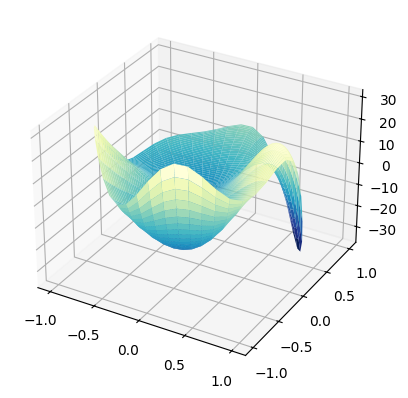

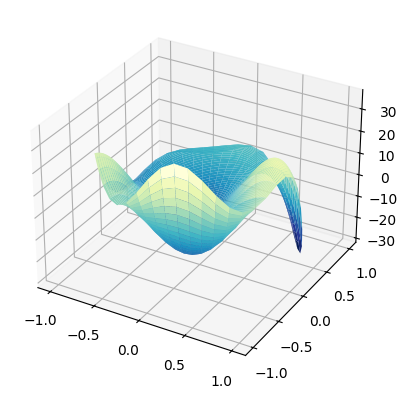

In [7]:
plot_surface_from_zernike_coefficients(prediction[0], True)
plot_surface_from_zernike_coefficients(labels[-1], True)